Importar las librerías necesarias

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [26]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data = pd.read_excel('./Facturacion.xlsx')

In [27]:
# Visualizar las primeras filas
data.head()

# Información sobre las columnas y tipos de datos
data.info()

# Estadísticas descriptivas
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13241 entries, 0 to 13240
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Código Episodio            13241 non-null  int64         
 1   Valor neto                 13241 non-null  float64       
 2   Mon.                       13241 non-null  object        
 3   Creado el                  13241 non-null  datetime64[ns]
 4   Aseguradora                13241 non-null  object        
 5   Clase episodio             13241 non-null  object        
 6   Centro de Responsabilidad  13241 non-null  int64         
 7   Género                     13241 non-null  object        
 8   Población                  13241 non-null  object        
 9   Edad                       13236 non-null  object        
 10  Causa Externa              3716 non-null   object        
 11  Pais de Nacimiento         13231 non-null  object        
dtypes: d

,Código Episodio,Valor neto,Creado el,Centro de Responsabilidad
count,13241.00,13241.00,13241,13241.00
mean,4666926.08,1694047.23,2023-01-17 08:03:17.930669824,530375.39
min,3039345.00,0.00,2023-01-01 00:00:00,530101.00
25%,4666835.00,44400.00,2023-01-11 00:00:00,530201.00
50%,4674617.00,85350.00,2023-01-18 00:00:00,530301.00
75%,4683137.00,281623.50,2023-01-25 00:00:00,530718.00
max,4691705.00,355237902.00,2023-01-31 00:00:00,530815.00
std,61767.15,10718482.29,NaN,269.23


Comprobamos valores nulos

In [28]:
data.isnull().sum()

Código Episodio                 0
Valor neto                      0
Mon.                            0
Creado el                       0
Aseguradora                     0
Clase episodio                  0
Centro de Responsabilidad       0
Género                          0
Población                       0
Edad                            5
Causa Externa                9525
Pais de Nacimiento             10
dtype: int64

Convierte el codigo episodio en texto para no tenerlo en cuenta como campo numerico

In [29]:
data['Código Episodio'] = data['Código Episodio'].astype(str)

Datos Exploratorios

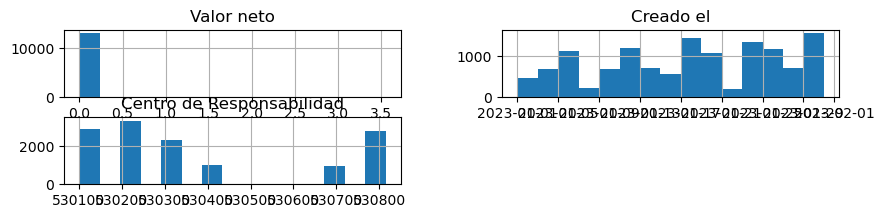

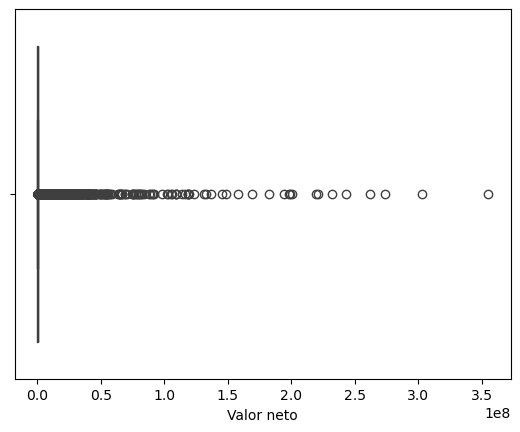

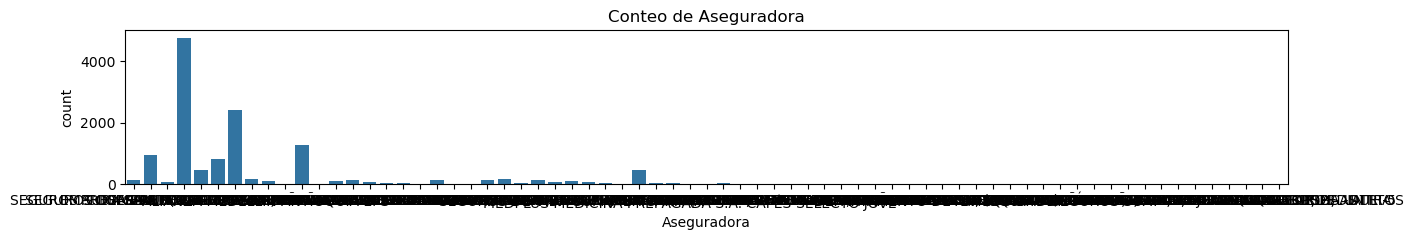

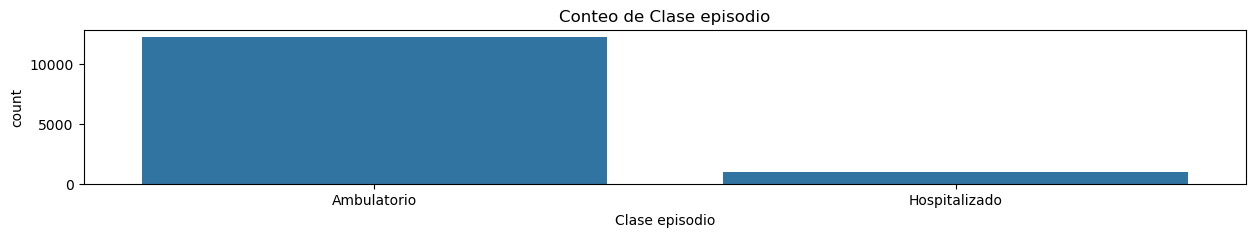

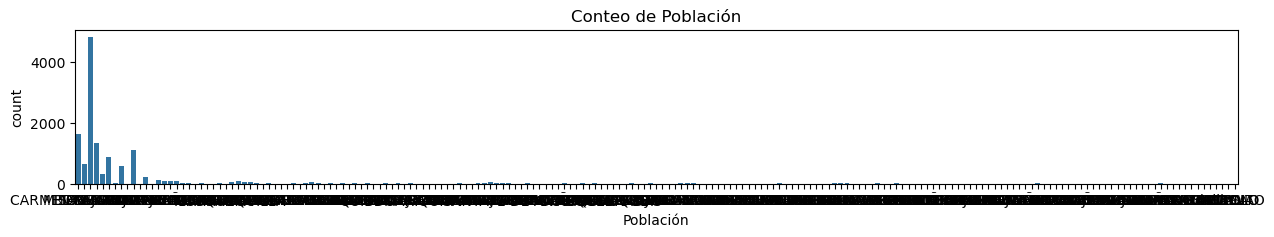

In [30]:
# Histogramas para las variables numéricas
data.hist(bins=15, figsize=(10, 2))
plt.show()

# Boxplot para detectar outliers
sns.boxplot(x=data['Valor neto'])
plt.show()

# Gráficos de barras 
for col in ['Aseguradora','Clase episodio','Población']:
    plt.figure(figsize=(15, 2))
    sns.countplot(data=data, x=col)
    plt.title(f'Conteo de {col}')
    plt.show()

Aplica TRM 

In [31]:
data['Valor neto'] = data['Valor neto'] * 4000

In [36]:
data.dropna()

,Código Episodio,Valor neto,Mon.,Creado el,Aseguradora,Clase episodio,Centro de Responsabilidad,Género,Población,Edad,Causa Externa,Pais de Nacimiento
0,4655611,262800000.00,COP,2023-01-01,EMPRESAS PUBLICAS,Ambulatorio,530101,F,MEDELLIN,58 A,Enfermedad General,colombiana
1,4656568,111143880000.00,COP,2023-01-01,EPS SURA,Hospitalizado,530718,M,CARMEN DE VIBORAL,30 A,Enfermedad General,colombiana
2,4661360,967608000.00,COP,2023-01-01,"SEGUROS SURA SALUD, POLIZA EVOLUCIONA",Ambulatorio,530101,F,RIONEGRO,44 A,Enfermedad General,colombiana
3,4661360,391800000.00,COP,2023-01-01,PARTICULARES,Ambulatorio,530101,F,RIONEGRO,44 A,Enfermedad General,colombiana
4,4661368,265512000.00,COP,2023-01-01,COLSANITAS MED PREPAGADA,Ambulatorio,530101,M,RETIRO,27 A,Enfermedad General,colombiana
...,...,...,...,...,...,...,...,...,...,...,...,...
13236,4691703,405000000.00,COP,2023-01-31,PARTICULARES,Ambulatorio,530301,M,ENVIGADO,36,Enfermedad General,colombiana
13237,4691704,713424000.00,COP,2023-01-31,"SEGUROS DE VIDA SURAMERICANA, POLIZAS GLOBAL O...",Ambulatorio,530301,M,RETIRO,42,Enfermedad General,colombiana
13238,4691704,405000000.00,COP,2023-01-31,PARTICULARES,Ambulatorio,530301,M,RETIRO,42,Enfermedad General,colombiana
13239,4691705,574482000.00,COP,2023-01-31,"SEGUROS DE VIDA SURAMERICANA, POLIZAS GLOBAL O...",Ambulatorio,530301,F,RETIRO,05:00:00,Enfermedad General,colombiana


Compramos la cantidad de valores unicos en los centros de costos y si tiene nulos

In [38]:
print(data['Centro de Responsabilidad'].value_counts())
data['Centro de Responsabilidad'].fillna('Desconocido', inplace=True)

Centro de Responsabilidad
530201    2137
530101    2005
530301    1467
530401     725
530718     671
530812     610
530809     568
530801     552
530815      81
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16088\935927496.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Centro de Responsabilidad'].fillna('Desconocido', inplace=True)


Eliminamos valores nulos o rellenamos con ceros en caso de aplicar

In [39]:
data.dropna(subset=['Valor neto', 'Centro de Responsabilidad'], inplace=True)
data.fillna(0, inplace=True)

convertimos la fecha en datetime y la establecmos con indice de agragación

In [42]:
data['Creado el'] = pd.to_datetime(data['Creado el'])
data.set_index('Creado el', inplace=True)
df_semanal = data['Valor neto'].resample('W').sum() 
print(df_semanal)

Creado el
2023-01-01     159915096000.00
2023-01-08   14476260202620.00
2023-01-15   14990858970000.00
2023-01-22   19355600436000.00
2023-01-29   18053330616000.00
2023-02-05   15850358646240.00
Freq: W-SUN, Name: Valor neto, dtype: float64


Gráfico de autocorrelación (ACF) y autocorrelación parcial (PACF)

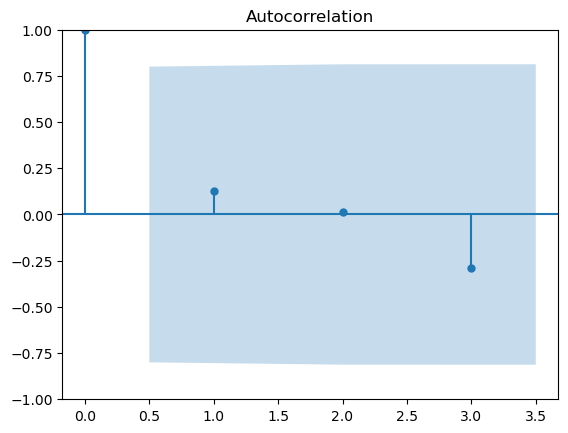

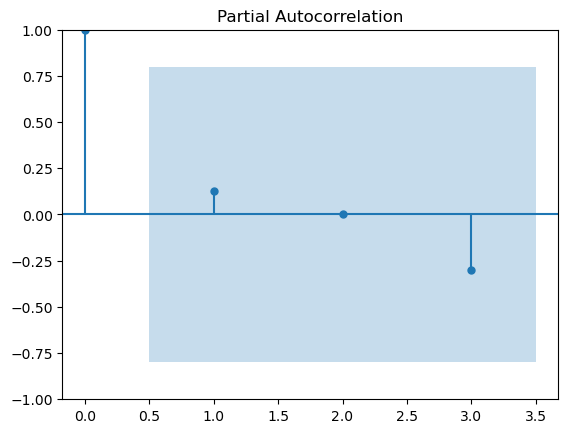

In [48]:
plot_acf(df_semanal)
plt.show()

plot_pacf(df_semanal)
plt.show()

Modelo Arima

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_semanal, order=(1, 1, 1)) 
arima_model = model.fit()
forecast = arima_model.forecast(steps=1)
print("Predicción de ingresos para la próxima semana:", forecast)

In [130]:

print(df_semanal)
print(forecast)
df_semanal.to_csv('ingresos_hospital.csv')  # Exportar datos históricos de ingresos
forecast.to_csv('predicciones_ingresos.csv')  # Exportar predicciones semanales

Creado el
2023-01-01     159915096000.00
2023-01-08   14470720402620.00
2023-01-15   14989649394000.00
2023-01-22   19355600436000.00
2023-01-29   18052250616000.00
2023-02-05   15845651490240.00
Freq: W-SUN, Name: Valor neto, dtype: float64
2023-02-12   18362212712792.30
Freq: W-SUN, dtype: float64
